In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pysam
import seaborn as sns
from tqdm import tqdm
import os
from matplotlib_venn import venn3
import gseapy as gp
from gseapy import Biomart, barplot, dotplot, enrichment_map
import networkx as nx
import glob

import cmapBQ.query as cmap_query
import cmapBQ.config as cmap_config
from cmapPy.pandasGEXpress.write_gctx import write as write_gctx

In [23]:
# In your Jupyter notebook
from helper_functions import *

## Data Import

In [4]:
DEG_sensSHY_R_Ss = pd.read_csv("/data/lvisser/DE_genes/DE_results_human_Group_R_Ss_sensSHY.csv", index_col=0)
DEG_sensSHY_R_Ss["rank"] = -np.log10(DEG_sensSHY_R_Ss["padj"])*DEG_sensSHY_R_Ss['log2FoldChange']
all_sensSHY_R_Ss = DEG_sensSHY_R_Ss["name"].dropna().tolist()
DEG_sensSHY_R_Ss = DEG_sensSHY_R_Ss[DEG_sensSHY_R_Ss['padj'] < 0.05]
# Filter upregulated genes
upregulated_genes_sensSHY_R_Ss = DEG_sensSHY_R_Ss[DEG_sensSHY_R_Ss['log2FoldChange'] > 1]["name"].dropna().tolist()
# Filter downregulated genes
downregulated_genes_sensSHY_R_Ss = DEG_sensSHY_R_Ss[DEG_sensSHY_R_Ss['log2FoldChange'] < -1]["name"].dropna().tolist()
# Save upregulated genes to a CSV file
pd.DataFrame(upregulated_genes_sensSHY_R_Ss).to_csv('/data/lvisser/DE_genes/upregulated_genes_sensSHY_R_Ss.txt', index=False, header=False, sep='\t')
# Save downregulated genes to a CSV file
pd.DataFrame(downregulated_genes_sensSHY_R_Ss).to_csv('/data/lvisser/DE_genes/downregulated_genes_sensSHY_R_Ss.txt', index=False, header=False, sep='\t')
print(DEG_sensSHY_R_Ss.shape)
DEG_sensSHY_R_Ss.head()

(8170, 17)


,baseMean,log2FoldChange,lfcSE,pvalue,padj,SH-SY5Y_C2,SH-SY5Y_C1,SH-SY5Y_J2,SH-SY5Y_J4,SH-SY5Y_C4,SH-SY5Y_J3,SH-SY5Y_J1,SH-SY5Y_C3,name,type,description,rank
ENSG00000180573,2826.190743,-2.304114,0.066354,2.939656e-265,7.644575e-261,997.190963,991.140330,4595.959023,4593.207471,882.237789,4785.644613,4837.258636,926.887119,H2AC6,protein_coding,H2A clustered histone 6 [Source:HGNC Symbol;Ac...,-599.338280
ENSG00000220323,1793.105477,-3.932904,0.118568,3.005440e-243,3.907823e-239,205.434664,176.785675,3202.870585,3284.405102,230.494558,3931.838593,3058.200312,254.814328,H2BC19P,transcribed_unprocessed_pseudogene,"H2B clustered histone 19, pseudogene [Source:H...",-937.635971
ENSG00000261716,4040.968269,-3.512553,0.117172,3.127137e-199,2.710707e-195,679.600077,536.059787,7318.029174,7042.734431,559.772497,8330.795697,7066.052299,794.702187,H2BC20P,transcribed_unprocessed_pseudogene,"H2B clustered histone 20, pseudogene [Source:H...",-683.426554
ENSG00000112936,14796.068879,2.666530,0.098941,2.814268e-161,1.829626e-157,25865.889876,28836.594900,3843.937831,3514.478782,22530.559136,4001.442345,4627.066540,25148.581622,C7,protein_coding,complement C7 [Source:HGNC Symbol;Acc:HGNC:1346],417.945643
ENSG00000158373,1881.356855,-1.918063,0.071474,1.043303e-159,5.426218e-156,838.395520,813.214103,2984.250217,2904.163572,730.088672,3122.888324,2898.189212,759.665216,H2BC5,protein_coding,H2B clustered histone 5 [Source:HGNC Symbol;Ac...,-297.809061


In [5]:
DEG_NB_R_S = pd.read_csv("/data/lvisser/DE_genes/DE_results_human_Group_R_S_NB.csv", index_col=0)
DEG_NB_R_S["rank"] = -np.log10(DEG_NB_R_S["padj"])*DEG_NB_R_S['log2FoldChange']
all_NB_R_S = DEG_NB_R_S["name"].dropna().tolist()
DEG_NB_R_S = DEG_NB_R_S[DEG_NB_R_S['padj'] < 0.05]
# Filter upregulated genes
upregulated_genes_NB_R_S = DEG_NB_R_S[DEG_NB_R_S['log2FoldChange'] > 1]["name"].dropna().tolist()
# Filter downregulated genes
downregulated_genes_NB_R_S = DEG_NB_R_S[DEG_NB_R_S['log2FoldChange'] < -1]["name"].dropna().tolist()
# Save upregulated genes to a CSV file
pd.DataFrame(upregulated_genes_NB_R_S).to_csv('/data/lvisser/DE_genes/upregulated_genes_NB_R_S.txt', index=False, header=False, sep='\t')
# Save downregulated genes to a CSV file
pd.DataFrame(downregulated_genes_NB_R_S).to_csv('/data/lvisser/DE_genes/downregulated_genes_NB_R_S.txt', index=False, header=False, sep='\t')
print(DEG_NB_R_S.shape)
DEG_NB_R_S.head()

(8362, 35)


,baseMean,log2FoldChange,lfcSE,pvalue,padj,IMR14nov_R1,SHY2sept_R1,SKN10nov_R1,SHP14nov_R1,SHP12dec_R4,...,SH-SY5Y_J2,SH-SY5Y_J4,SH-SY5Y_C4,SH-SY5Y_J3,SH-SY5Y_J1,SH-SY5Y_C3,name,type,description,rank
ENSG00000135540,233.497948,-7.698880,0.313397,1.781157e-134,5.590695e-130,795.138444,0.000000,4.910630,419.282192,438.956284,...,0.000000,2.496951,2.110125,0.000000,0.855965,2.976891,NHSL1,protein_coding,NHS like 1 [Source:HGNC Symbol;Acc:HGNC:21021],-995.099688
ENSG00000145808,2215.649601,5.341513,0.218482,4.664153e-133,7.319922e-129,73.794751,1479.210118,3431.302656,40.234150,68.095844,...,4828.227809,5333.488302,3803.500357,4682.154858,4953.470365,3873.678819,ADAMTS19,protein_coding,ADAM metallopeptidase with thrombospondin type...,684.437378
ENSG00000116983,419.907743,7.715693,0.317429,9.996643e-132,1.045915e-127,0.000000,863.720351,848.311319,1.058793,0.000000,...,475.948795,429.475650,687.900758,438.116923,463.933115,637.798799,HPCAL4,protein_coding,hippocalcin like 4 [Source:HGNC Symbol;Acc:HGN...,979.742566
ENSG00000112038,1007.654963,9.419500,0.397937,6.689737e-126,5.249437e-122,9.224344,2299.184915,1002.996161,0.000000,0.000000,...,585.783133,563.062553,1564.657706,658.933479,572.640690,1993.772441,OPRM1,protein_coding,opioid receptor mu 1 [Source:HGNC Symbol;Acc:H...,1142.395848
ENSG00000112936,7314.561892,11.833568,0.564453,1.963517e-103,1.232617e-99,2.767303,14336.333550,1928.649901,6.352760,6.285770,...,3494.525141,3184.861578,20935.605433,3638.550501,4183.101724,23504.039282,C7,protein_coding,complement C7 [Source:HGNC Symbol;Acc:HGNC:1346],1170.448383


In [6]:
whitelist = pd.read_csv("/data/lvisser/ferroptosis_gene_whitelists/complete_gene_list_no_duplicates.txt", index_col = 0)
whitelist.columns = ["gene_symbol"]
print(whitelist.shape)
whitelist.head()

(1271, 1)


,gene_symbol
1,NR4A1
2,NR4A2
3,NR4A3
4,ACACA
5,ACLY


In [20]:
gene_bodies_105 = pd.read_csv("/data/lvisser/segmentations/gene_bodies_105.csv", dtype={2: str})
print(gene_bodies_105.shape)
gene_bodies_105.head()

(39620, 6)


,start,end,chrom,gene_symbol,segment_id,length
0,577,647,chrMT,MT-TF,chrMT:577-647,70
1,648,1601,chrMT,MT-RNR1,chrMT:648-1601,953
2,1602,1670,chrMT,MT-TV,chrMT:1602-1670,68
3,1671,3229,chrMT,MT-RNR2,chrMT:1671-3229,1558
4,3230,3304,chrMT,MT-TL1,chrMT:3230-3304,74


## Roberto

### Expression

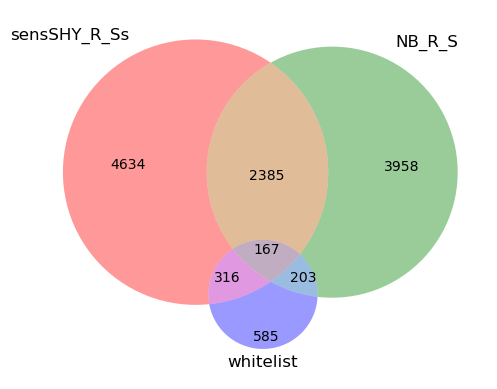

In [134]:
# Assuming gene_symbols_1, gene_symbols_2, and gene_symbols_3 are your three datasets
gene_symbols_1 = set(DEG_sensSHY_R_Ss['name'])
gene_symbols_2 = set(DEG_NB_R_S['name'])
gene_symbols_3 = set(whitelist['gene_symbol'])

venn3([gene_symbols_1, gene_symbols_2, gene_symbols_3], ('sensSHY_R_Ss', 'NB_R_S', 'whitelist'))

plt.show()

In [135]:
# Genes unique to sensSHY_R_Ss
unique_to_sensSHY_R_Ss = list(gene_symbols_1 - gene_symbols_2)

# Genes that overlap with NB_R_S
overlap_with_NB_R_S = list(gene_symbols_1 & gene_symbols_2)

In [136]:
# Get all available gene sets
gene_sets = gp.get_library_name(organism = "Human")  # or 'Mouse'

print(gene_sets)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_2023', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_2024', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and_Tissue_2021', 'Diabetes_Perturbations_GEO_2022', 'DisGeNET', 'Disease_Per

In [137]:
# # run prerank
# # enrichr libraries are supported by prerank module. Just provide the name
# # use 4 process to acceralate the permutation speed
pre_res = gp.prerank(rnk=DEG_sensSHY_R_Ss[["name", "rank"]].dropna().reset_index(drop=True), # or rnk = rnk,
                     gene_sets=['MSigDB_Hallmark_2020','KEGG_2021_Human', 'GO_Molecular_Function_2023', 'GO_Biological_Process_2023', 'GO_Cellular_Component_2023'],
                     background=all_sensSHY_R_Ss,
                     threads=8,
                     min_size=5,
                     max_size=1000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True, # see what's going on behind the scenes
                    )

pre_res.res2d.head(5)

2024-04-07 00:28:18,458 [INFO] Input gene rankings contains duplicated IDs
2024-04-07 00:28:18,464 [INFO] Parsing data files for GSEA.............................
2024-04-07 00:28:18,465 [INFO] Enrichr library gene sets already downloaded in: /home/lvisser/.cache/gseapy, use local file
2024-04-07 00:28:18,469 [INFO] Enrichr library gene sets already downloaded in: /home/lvisser/.cache/gseapy, use local file
2024-04-07 00:28:18,483 [INFO] Enrichr library gene sets already downloaded in: /home/lvisser/.cache/gseapy, use local file
2024-04-07 00:28:18,503 [INFO] Enrichr library gene sets already downloaded in: /home/lvisser/.cache/gseapy, use local file
2024-04-07 00:28:18,588 [INFO] Enrichr library gene sets already downloaded in: /home/lvisser/.cache/gseapy, use local file
2024-04-07 00:28:18,699 [INFO] 2883 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-04-07 00:28:18,700 [INFO] 4515 gene_sets used for further statistical testing.....
2024-04-07 00:28:18,701 [I

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,GO_Biological_Process_2023__Antimicrobial Humo...,-0.958525,-1.956058,0.007407,1.0,0.582,4/12,0.84%,H2BC21;H2BC8;H2BC12;H2BC11
1,prerank,KEGG_2021_Human__Neutrophil extracellular trap...,-0.91154,-1.952128,0.0,0.687273,0.604,33/79,2.28%,H2AC6;H2BC21;H3C10;H2BC5;H2AC19;H2BC6;H2BC8;H2...
2,prerank,GO_Biological_Process_2023__Antimicrobial Humo...,-0.986591,-1.928301,0.0,0.772912,0.755,4/8,0.84%,H2BC21;H2BC8;H2BC12;H2BC11
3,prerank,GO_Biological_Process_2023__protein-DNA Comple...,-0.91666,-1.91724,0.0,0.711156,0.803,8/25,2.67%,H2BC21;H2BC8;H4C9;H2BC9;H2BC11;H2BC17;H2BC15;BRD2
4,prerank,GO_Biological_Process_2023__Nucleosome Assembl...,-0.929245,-1.91681,0.0,0.574304,0.808,8/22,2.67%,H2BC21;H2BC8;H4C9;H2BC9;H2BC11;H2BC17;H2BC15;BRD2


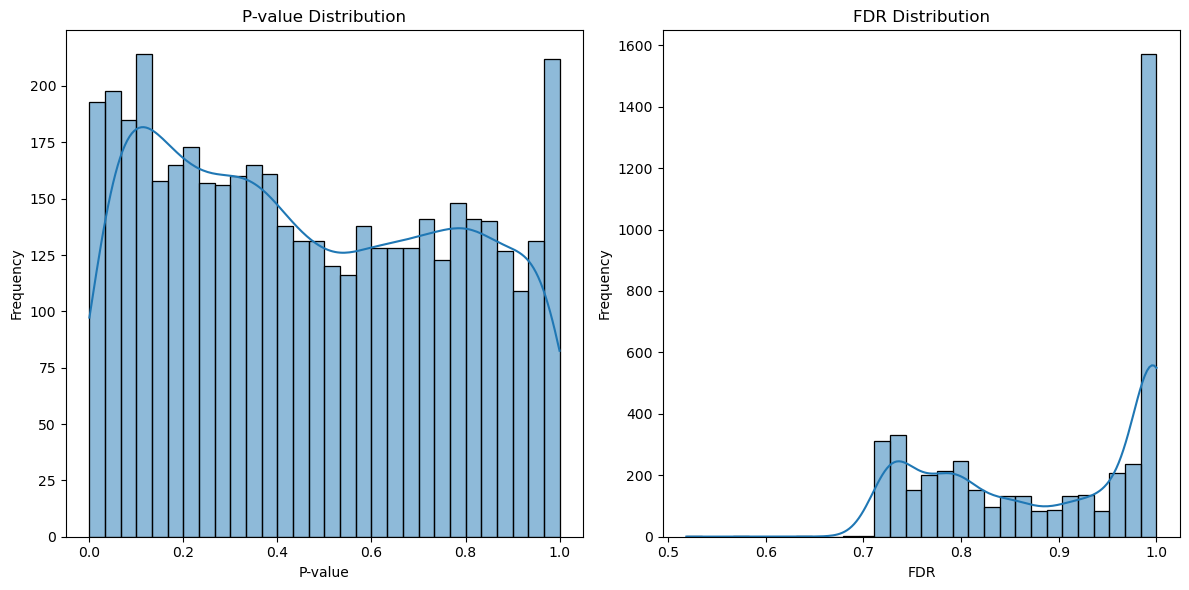

In [139]:
# Assuming 'pval' and 'fdr' are the columns with p-values and FDRs
pvals = pre_res.res2d['NOM p-val']
fdrs = pre_res.res2d['FDR q-val']

# Create a new figure
plt.figure(figsize=(12, 6))

# Create a subplot for p-values
plt.subplot(1, 2, 1)
sns.histplot(pvals, bins=30, kde=True)
plt.title('P-value Distribution')
plt.xlabel('P-value')
plt.ylabel('Frequency')

# Create a subplot for FDRs
plt.subplot(1, 2, 2)
sns.histplot(fdrs, bins=30, kde=True)
plt.title('FDR Distribution')
plt.xlabel('FDR')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

### Methylation

In [25]:
# Call the function
folder = "/data/lvisser/wgbs_tools/outputs/segmentations/roberto_only/unfiltered"
wgbs_seg_roberto = process_wgbs_seg_files(folder)
wgbs_seg_roberto = find_annot_overlap(wgbs_seg_roberto, gene_bodies_105)
wgbs_seg_roberto.to_csv("/data/lvisser/feature_matrices/wgbs_seg_roberto.csv", index = False)

In [26]:
wgbs_seg_roberto = pd.read_csv("/data/lvisser/feature_matrices/wgbs_seg_roberto.csv")
print(wgbs_seg_roberto.shape)
wgbs_seg_roberto.head()

(35390, 11)


,chrom,start,end,startCpG,endCpG,SH-SY5Y_C1,SH-SY5Y_C2,SH-SY5Y_J1,SH-SY5Y_J2,segment_id,gene_symbol
0,chr22,10735024,10736556,27220463,27220472,0.02,0.02,0.04,0.04,chr22:10735024-10736556,U2
1,chr22,10940062,10941691,27221483,27221503,0.16,0.08,0.07,0.15,chr22:10940062-10941691,FRG1FP
2,chr22,12602347,12603222,27233418,27233456,0.22,0.05,0.14,0.07,chr22:12602347-12603222,FRG1GP
3,chr22,15324732,15326620,27269778,27269787,0.11,0.07,0.07,0.00,chr22:15324732-15326620,ZNF72P
4,chr22,15349325,15351208,27269912,27269936,0.00,0.04,0.02,0.04,chr22:15349325-15351208,BNIP3P2


In [12]:
# Call the function
folder = '/data/lvisser/wgbs_tools/outputs/dmr/roberto_only/unfiltered'  # replace with your folder
wgbs_dmr_roberto = process_wgbs_dmr_files(folder)
wgbs_dmr_roberto.to_csv("/data/lvisser/feature_matrices/wgbs_dmr_roberto.csv", index = False)

In [13]:
wgbs_dmr_roberto = pd.read_csv("/data/lvisser/feature_matrices/wgbs_dmr_roberto.csv")
print(wgbs_dmr_roberto.shape)
wgbs_dmr_roberto.head()

(6958, 18)


,chrom,start,end,startCpG,endCpG,target,segment_id,lenCpG,bp,tg_mean,bg_mean,delta_means,delta_quants,delta_maxmin,ttest,direction,gene_symbol,length
0,chr8,737112,737143,12456072,12456078,R,chr8:737112-737143,6CpGs,31bp,0.292,0.893,0.601,0.479,0.452,0.034700,U,none,31
1,chr8,1338555,1338871,12469347,12469354,R,chr8:1338555-1338871,7CpGs,316bp,0.292,0.833,0.542,0.442,0.417,0.028300,U,none,316
2,chr8,2001015,2001562,12485109,12485176,R,chr8:2001015-2001562,67CpGs,547bp,0.000,0.550,0.550,0.544,0.544,0.000129,U,none,547
3,chr8,2086504,2086532,12487198,12487201,R,chr8:2086504-2086532,3CpGs,28bp,0.325,0.794,0.470,0.376,0.367,0.038400,U,none,28
4,chr8,2108412,2108795,12487644,12487652,R,chr8:2108412-2108795,8CpGs,383bp,0.330,0.797,0.467,0.397,0.360,0.027700,U,none,383


In [14]:
wgbs_seg_nb1 = pd.read_csv("/data/lvisser/feature_matrices/wgbs_seg_nb1.csv")
print(wgbs_seg_nb1.shape)
wgbs_seg_nb1.head()

(1895562, 10)


,chrom,start,end,startCpG,endCpG,IMR14nov_R1,SHP12dec_R4,SHY2sept_R1,SKN14nov_R2,segment_id
0,chr22,10510235,10512049,27218094,27218104,0.88,0.04,0.04,0.06,chr22:10510235-10512049
1,chr22,10513853,10515736,27218105,27218120,0.92,0.02,0.08,0.07,chr22:10513853-10515736
2,chr22,10516017,10517750,27218120,27218125,1.00,0.15,0.00,0.00,chr22:10516017-10517750
3,chr22,10518304,10520219,27218125,27218137,1.00,0.00,0.00,0.09,chr22:10518304-10520219
4,chr22,10520752,10522650,27218139,27218150,NaN,0.11,0.00,0.06,chr22:10520752-10522650


In [15]:
wgbs_dmr_nb1 = pd.read_csv("/data/lvisser/feature_matrices/wgbs_dmr_nb1.csv")
print(wgbs_dmr_nb1.shape)
wgbs_dmr_nb1.head()

(37200, 18)


,chrom,start,end,startCpG,endCpG,target,segment_id,lenCpG,bp,tg_mean,bg_mean,delta_means,delta_quants,delta_maxmin,ttest,direction,gene_symbol,length
0,chr8,339324,339424,12448810,12448816,R,chr8:339324-339424,6CpGs,100bp,0.1650,0.746,0.581,0.457,0.404,0.0442,U,none,100
1,chr8,636727,636822,12453158,12453162,R,chr8:636727-636822,4CpGs,95bp,0.3810,0.882,0.501,0.471,0.446,0.0091,U,none,95
2,chr8,1373259,1373562,12470337,12470371,R,chr8:1373259-1373562,34CpGs,303bp,0.0185,0.813,0.794,0.707,0.693,0.0111,U,none,303
3,chr8,1956798,1957098,12483994,12484007,R,chr8:1956798-1957098,13CpGs,300bp,0.1170,0.909,0.792,0.684,0.658,0.0157,U,none,300
4,chr8,1958036,1958341,12484025,12484039,R,chr8:1958036-1958341,14CpGs,305bp,0.0329,0.607,0.574,0.503,0.499,0.0160,U,none,305
